# Smart Pressure Cooker
Bulid 'Smart Pressure Cooker' fuzzy logic-based system using Scikit-Fuzzy library in python.

### Input Variables
-  Food_Type
-  Cooking_Duration

### Output Variables 
-  Temperature
-  Pressure

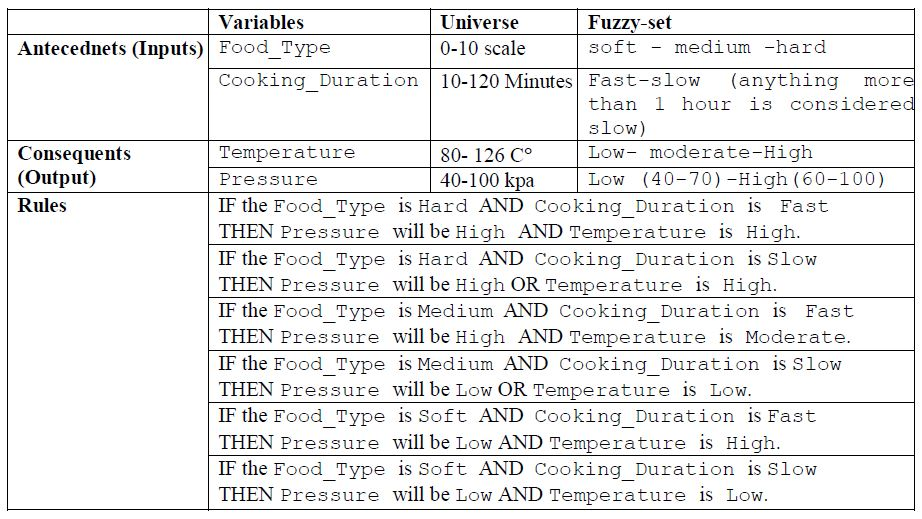

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## FUZZIFICATION

In [2]:

# Generate universe variables 
#  * Food_Type has a range of [0,10]
#  * Cooking_Duration has a range of [10,120]
#  * Temperature has a range of [80,126]
#  * Pressure has a range of [40,100]
Food_Type = np.arange(0,11,1)
Cooking_Duration = np.arange(10,121,1)
Temperature = np.arange(80,127,1)
Pressure = np.arange(40,101,1)

# Generate fuzzy membership functions
# Membership functions for food type
soft = fuzz.trimf(Food_Type, [0, 0, 5])
medium = fuzz.trimf(Food_Type, [0, 5, 10])
hard = fuzz.trimf(Food_Type, [5, 10, 10])

# Membership functions for Cooking Duration
fast = fuzz.trimf(Cooking_Duration, [10, 10, 59])
slow = fuzz.trimf(Cooking_Duration, [60,120, 120])

# Membership functions for Temperature
t_low = fuzz.trimf(Temperature, [80, 80, 103])
t_moderate = fuzz.trimf(Temperature, [80, 103, 126])
t_high = fuzz.trimf(Temperature, [103, 126, 126])

# Membership functions for Pressure
p_low = fuzz.trimf(Pressure, [40,40, 70])
p_high = fuzz.trimf(Pressure, [60,100, 100])



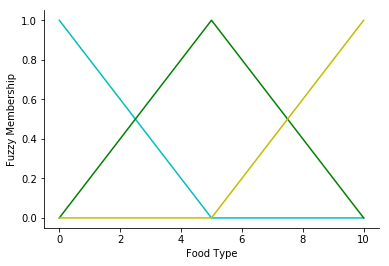

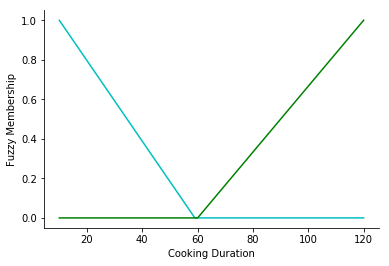

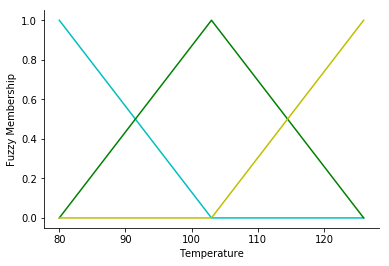

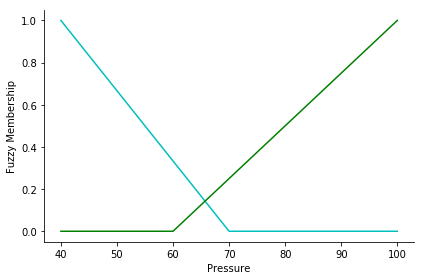

In [3]:
# Visualize these universes and membership functions
# Visualize membership functions for food type
fig, ax0 = plt.subplots()
ax0.plot(Food_Type,soft,'c',Food_Type,medium,'g',Food_Type,hard,'y')
ax0.set_ylabel('Fuzzy Membership')
ax0.set_xlabel('Food Type')

# Visualize membership functions for Cooking Duration
fig, ax1 = plt.subplots()
ax1.plot(Cooking_Duration,fast,'c',Cooking_Duration,slow,'g')
ax1.set_ylabel('Fuzzy Membership')
ax1.set_xlabel('Cooking Duration')


# Visualize membership functions for Temperature
fig, ax2 = plt.subplots()
ax2.plot(Temperature,t_low,'c',Temperature,t_moderate,'g',Temperature,t_high,'y')
ax2.set_ylabel('Fuzzy Membership')
ax2.set_xlabel('Temperature')

# Visualize membership functions for Cooking Duration
fig, ax3 = plt.subplots()
ax3.plot(Pressure,p_low,'c',Pressure,p_high,'g')
ax3.set_ylabel('Fuzzy Membership')
ax3.set_xlabel('Pressure')

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Rule Evaluation
### Rules:
-  **IF** the Food_Type is Hard **AND** Cooking_Duration is Fast **THEN** Pressure will be High **AND** Temperature is High.

-  **IF** the Food_Type is Hard **AND** Cooking_Duration is Slow **THEN** Pressure will be High **OR** Temperature is High.

-  **IF** the Food_Type is Medium **AND** Cooking_Duration is Fast **THEN** Pressure will be High **AND** Temperature is Moderate.

-  **IF** the Food_Type is Medium **AND** Cooking_Duration is Slow **THEN** Pressure will be Low **OR** Temperature is Low.

-  **IF** the Food_Type is Soft **AND** Cooking_Duration is Fast **THEN** Pressure will be Low **AND** Temperature is High.

-  **IF** the Food_Type is Soft **AND** Cooking_Duration is Slow **THEN** Pressure will be Low **AND** Temperature is Low.

### Predict the output of the following query
If a person is cooking a chicken (food-type rate is 4.6) and he/she wants the food to be ready in 30 minutes what are the recommended cooking temperature and pressure level?


In [4]:
# Food Type rate is 4.6 and Cook Duration is 30 min 
# Relations between food types in value 4.6
type_hard = fuzz.interp_membership(Food_Type, hard, 4.6)
type_soft = fuzz.interp_membership(Food_Type, soft, 4.6)
type_medium = fuzz.interp_membership(Food_Type, medium, 4.6)

# Relations between cook duration in value 30
duration_fast = fuzz.interp_membership(Cooking_Duration, fast, 30)
duration_slow = fuzz.interp_membership(Cooking_Duration, slow, 30)

# If Part 
# Rule-1 (IF the Food_Type is Hard AND Cooking_Duration is Fast )
hard_fast = np.fmin(type_hard,duration_fast)
# Rule-2 (IF the Food_Type is Hard AND Cooking_Duration is Slow)
hard_slow = np.fmin(type_hard,duration_slow)

# Rule-3 (IF the Food_Type is Medium AND Cooking_Duration is Fast )
medium_fast = np.fmin(type_medium,duration_fast)
# Rule-4 (IF the Food_Type is Medium AND Cooking_Duration is Slow )
medium_slow = np.fmin(type_medium,duration_slow)

# Rule-5 (IF the Food_Type is Soft AND Cooking_Duration is Fast)
soft_fast = np.fmin(type_soft,duration_fast)
# Rule-6 (IF the Food_Type is Soft AND Cooking_Duration is Slow)
soft_slow = np.fmin(type_soft,duration_slow)
 
# Find maximum between if part for high pressure, from R1,R2 and R3
# then combine between high pressure and maximum on if part 
c_p_high = np.fmax(hard_fast,np.fmax(hard_slow,medium_fast))
c_p_high_final = np.fmin(c_p_high,p_high)

# Find maximum between if part for low pressure, from R4,R5 and R6
# then combine between low pressure and maximum on if part 
c_p_low = np.fmax(medium_slow,np.fmax(soft_fast,soft_slow))
c_p_low_final = np.fmin(c_p_low,p_low)

# Find maximum between if part for high temperature, from R1,R2 and R5
# then combine between high temperature and maximum on if part 
c_t_high = np.fmax(hard_fast,np.fmax(hard_slow,soft_fast)).ravel()
c_t_high_final = np.fmin(c_t_high,t_high)

# Find maximum between if part for low temperature, from R4 and R6
# then combine between high low and maximum on if part 
c_t_low = np.fmax(medium_slow, soft_slow)
c_t_low_final = np.fmin(c_t_low,t_low)

# then combine between high moderate and the result from R3
c_t_moderate = medium_fast
c_t_moderate_final = np.fmin(c_t_moderate,t_moderate)




## Aggregation of the rule outputs

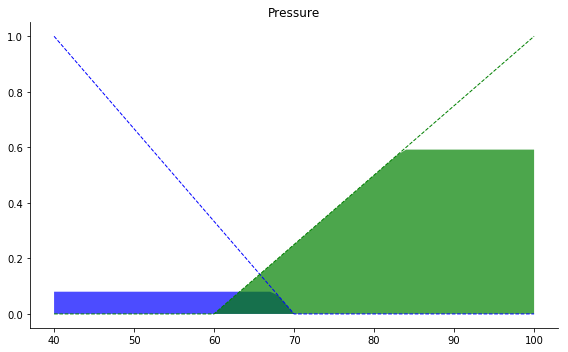

In [5]:
# Visualization
pre1 = np.zeros_like(Pressure)
fig, ax0 = plt.subplots(figsize=(8,5))

ax0.fill_between(Pressure, pre1, c_p_low_final, facecolor='b', alpha=0.7)
ax0.plot(Pressure, p_low, 'b', linewidth=1, linestyle='--', )
ax0.fill_between(Pressure, pre1, c_p_high_final, facecolor='g', alpha=0.7)
ax0.plot(Pressure, p_high, 'g', linewidth=1, linestyle='--')
ax0.set_title('Pressure')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

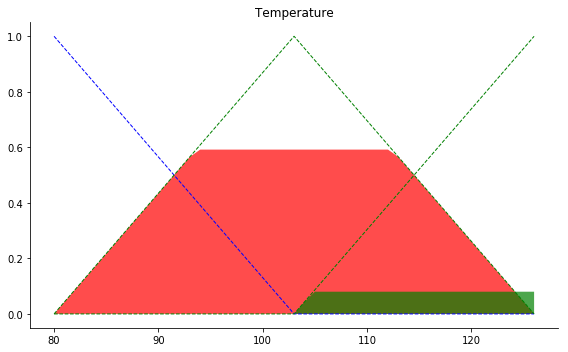

In [6]:
# Visualization
temp1 = np.zeros_like(Temperature)
fig, ax0 = plt.subplots(figsize=(8,5))

ax0.fill_between(Temperature, temp1, c_t_low_final, facecolor='b', alpha=0.7)
ax0.plot(Temperature, t_low, 'b', linewidth=1, linestyle='--', )
ax0.fill_between(Temperature, temp1, c_t_moderate_final, facecolor='r', alpha=0.7)
ax0.plot(Temperature, t_moderate, 'g', linewidth=1, linestyle='--')
ax0.fill_between(Temperature, temp1, c_t_high_final, facecolor='g', alpha=0.7)
ax0.plot(Temperature, t_high, 'g', linewidth=1, linestyle='--')
ax0.set_title('Temperature')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Defuzzification
#### Finally, to get a real world answer, we return to crisp logic from the world of fuzzy membership functions. For the purposes of this example the centroid method will be used.

### The result of pressure is 81 <br> The result of temperature is 103

Text(0.5,1,'Aggregated membership and result (line)')

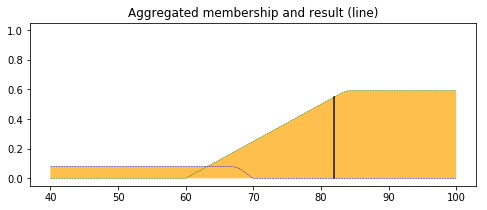

In [7]:
# Aggregate two output membership functions together
aggregated = np.fmax(c_p_low_final, c_p_high_final)

# Calculate defuzzified result
press = fuzz.defuzz(Pressure, aggregated, 'centroid')
press_activation = fuzz.interp_membership(Pressure, aggregated, press)  # for plot

# Visualization
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.set_ylim(-0.05, 1.05);
ax0.plot(Pressure, c_p_low_final, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(Pressure, c_p_high_final, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(Pressure, pre1, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([press, press], [0, press_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')


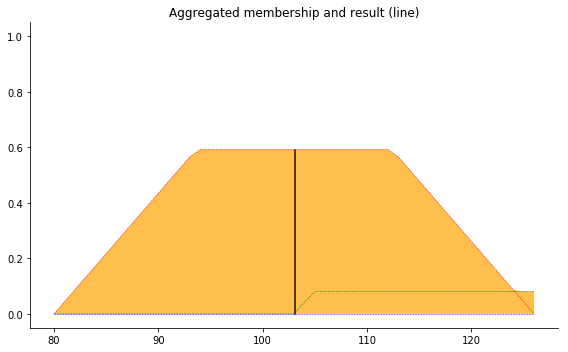

In [8]:
# Aggregate all three output membership functions together
aggregated = np.fmax(c_t_low_final,
                     np.fmax(c_t_moderate_final, c_t_high_final))

# Calculate defuzzified result
tempd = fuzz.defuzz(Temperature, aggregated, 'centroid')
tempd_activation = fuzz.interp_membership(Temperature, aggregated, tempd) 

# Visualization
fig, ax0 = plt.subplots(figsize=(8, 5))
ax0.set_ylim(-0.05, 1.05);
ax0.plot(Temperature, c_t_low_final, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(Temperature, c_t_moderate_final, 'r', linewidth=0.5, linestyle='--')
ax0.plot(Temperature, c_t_high_final, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(Temperature, temp1, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tempd, tempd], [0, tempd_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()